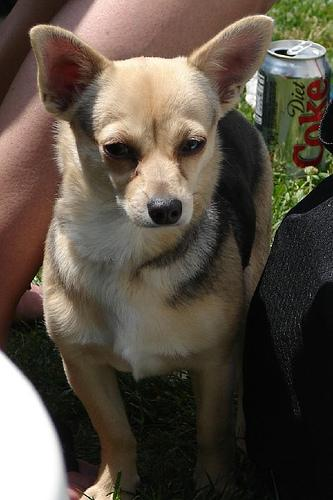

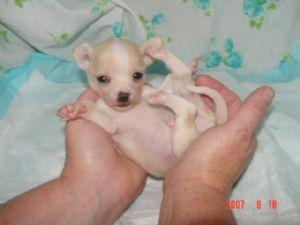

In [2]:
# Common
import os
import keras
import numpy as np
from tqdm import tqdm
from PIL import Image

# Google
from google.cloud import storage
from google.colab import drive

# Data
from keras.preprocessing.image import ImageDataGenerator

# Model
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, GlobalAvgPool2D

# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Transfer Learning Models
from tensorflow.keras.applications import ResNet152V2, InceptionV3

# Connect to GCS Bucket
RAW_DATA_BUCKET_NAME="team-engai-dogs"
client = storage.Client.from_service_account_json('./secrets/data-service-accounts.json')
bucket = client.get_bucket(RAW_DATA_BUCKET_NAME)
blob = bucket.blob('dog_breed_dataset/images/Images/n02085620-Chihuahua/n02085620_10074.jpg')
blob_validate = bucket.blob('dog_breed_dataset/images/Images/n02085620-Chihuahua/n02085620_11337.jpg')

# Test downloading one image
file_name = 'dog.jpg'
file_valid_name = 'dog_valid.jpg'

blob.download_to_filename(file_name)
image = Image.open(file_name)
display(image)

blob_validate.download_to_filename(file_valid_name)
image_valid = Image.open(file_valid_name)
display(image_valid)


In [ ]:
from google.cloud import storage

def download_all_images_from_GCS():
    """Downloads all dog breed images in GCS bucket in their respective folders"""
    storage_client = storage.Client()

    blobs = bucket.list_blobs()

    for blob in blobs:
        # Split the blob name into parts to extract folders
        parts = blob.name.split('/')

        folder_name = '/'.join(parts[:-1])
        print(folder_name)
        if parts[1] != 'images':
          continue

        if '.DS_Store' in parts:
            continue

        # Create folder
        if not os.path.exists(folder_name):
          print(folder_name)
          os.makedirs(folder_name)

        blob.download_to_filename(os.path.join(folder_name, parts[-1]))


download_all_images_from_GCS()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/images/Images/n02092002-Scottish_deerhound
dog_breed_dataset/

In [ ]:

PATH = './dog_breed_dataset/images/Images'
BREED_COUNT = 120

# Initialize Generator
gen = ImageDataGenerator(
    rescale=1./255,
    #horizontal_flip=True,
    #vertical_flip=True,
    #rotation_range=20,
    validation_split=0.8,
)


# Load data
train_ds = gen.flow_from_directory(
    PATH,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    subset='training'
)

valid_ds = gen.flow_from_directory(
    PATH,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    subset='validation',
)

# Model Name
name1 = "DogNetV1"

# Pretrained Model
base_model = ResNet152V2(include_top=False, input_shape=(224,224,3), weights='imagenet')
base_model.trainable = False # Freeze the Weights

# Model
DogNetV1 = Sequential([
    base_model,
    GlobalAvgPool2D(),
    Dense(224, activation='leaky_relu'),
    Dense(BREED_COUNT, activation='softmax')
], name=name1)

DogNetV1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='test.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train
DogNetV1.fit(
    train_ds,
    epochs=100,
    validation_data=valid_ds,
    callbacks=callbacks,
    verbose=1
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
Epoch 1/100
 27/516 [>.............................] - ETA: 2:09:34 - loss: 3.8158 - accuracy: 0.2396

In [ ]:
# Model Name
name2 = "DogNetV2"

# Pretrained Model
base_model = ResNet152V2(include_top=False, input_shape=(224,224,3), weights='imagenet')
base_model.trainable = False # Freeze the Weights

# Model
DogNetV2 = Sequential([
    base_model,
    GlobalAvgPool2D(),
    Dense(300, activation='relu'),
    Dense(150, activation='relu'),
    Dense(BREED_COUNT, activation='softmax')
], name=name2)

DogNetV2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='test.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train
DogNetV2.fit(
    train_ds,
    epochs=100,
    validation_data=valid_ds,
    callbacks=callbacks,
    verbose=1
)

archive.zip  sample_data  secrets  test.h5  training  validation


In [ ]:
name3 = "DogNetV3"

# Pretrained Model
base_model = InceptionV3(include_top=False, input_shape=(224,224,3), weights='imagenet', classes=BREED_COUNT)
base_model.trainable = False # Freeze the Weights

# Model
DogNetV3 = Sequential([
    base_model,
    GlobalAvgPool2D(),
    Dense(120, activation='relu'),
    Dense(BREED_COUNT, activation='softmax')
], name=name2)

DogNetV3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='test.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train
DogNetV3.fit(
    train_ds,
    epochs=100,
    validation_data=valid_ds,
    callbacks=callbacks,
    verbose=1
)